# NEO4J

## Anwendung in der Praxis

## How to connect to a Neo4j Database!

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen wird, sowie auch ein Volume und die Verbindung mit neo4j mit Username und Passwort.

In [73]:
!docker-compose -p completx_sql up -d

 Network completx_sql_default  Creating
 Network completx_sql_default  Created
 Volume "completx_sql_neo4j-data"  Creating
 Volume "completx_sql_neo4j-data"  Created
 Container neo4j-container  Creating
 Container neo4j-container  Created
 Container neo4j-container  Starting
 Container neo4j-container  Started


Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [3]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.


In [74]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd

In [8]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines_2021_cumulated = pd.read_csv('impfungen_2021.csv',delimiter=';')
vaccines_2022_cumulated = pd.read_csv('impfungen_2022.csv',delimiter=';')
vaccines_2023_cumulated = pd.read_csv('impfungen_2023.csv',delimiter=';')

In [70]:
faelle.head()

Datum  BundeslandID              Name  Testungen  \
0  2021-03-01T09:30:00+01:00             1        Burgenland     638575   
1  2021-03-01T09:30:00+01:00             2           Kärnten     675557   
2  2021-03-01T09:30:00+01:00             3  Niederösterreich    3400756   
3  2021-03-01T09:30:00+01:00             4    Oberösterreich    2162517   
4  2021-03-01T09:30:00+01:00             5          Salzburg     823353   

   TestungenPCR  TestungenAntigen  
0        155435            483140  
1        217933            457624  
2       1141984           2258772  
3        546777           1615740  
4        274598            548755

In [10]:
faelle.tail()

Datum  BundeslandID        Name  Testungen  \
6595  2022-12-20T09:30:00+02:00             6  Steiermark   22515339   
6596  2022-12-20T09:30:00+02:00             7       Tirol   10201158   
6597  2022-12-20T09:30:00+02:00             8  Vorarlberg    7295131   
6598  2022-12-20T09:30:00+02:00             9        Wien   73308019   
6599  2022-12-20T09:30:00+02:00            10  Österreich  204039989   

      TestungenPCR  TestungenAntigen  
6595       6653515          15861824  
6596       4456324           5744834  
6597       1652804           5642327  
6598      65638829           7669190  
6599     107516250          96523739

In [71]:
vaccines_2021_cumulated.head()

date  municipality_id               municipality_name  \
0  2024-01-01T23:59:59+01:00            10101                      Eisenstadt   
1  2024-01-01T23:59:59+01:00            10201                            Rust   
2  2024-01-01T23:59:59+01:00            10301  Breitenbrunn am Neusiedler See   
3  2024-01-01T23:59:59+01:00            10302                  Donnerskirchen   
4  2024-01-01T23:59:59+01:00            10303                     Großhöflein   

   municipality_population  vaccination_1  vaccination_2  vaccination_3  \
0                    15924          12095          11851           9740   
1                     1978           1595           1572           1329   
2                     1921           1517           1493           1285   
3                     1857           1525           1505           1295   
4                     2085           1739           1711           1411   

   vaccination_4+  
0            3639  
1             500  
2             569  
3             489  
4             433

In [ ]:
vaccines_2022_cumulated.head()

In [ ]:
vaccines_2023_cumulated.head()

In [ ]:
vaccines_2021_cumulated.tail()

In [ ]:
vaccines_2022_cumulated.tail()

In [72]:
vaccines_2023_cumulated.tail()

date  municipality_id     municipality_name  \
2110  2024-01-01T23:59:59+01:00            91901      Wien 19. Döbling   
2111  2024-01-01T23:59:59+01:00            92001  Wien 20. Brigittenau   
2112  2024-01-01T23:59:59+01:00            92101  Wien 21. Floridsdorf   
2113  2024-01-01T23:59:59+01:00            92201   Wien 22. Donaustadt   
2114  2024-01-01T23:59:59+01:00            92301      Wien 23. Liesing   

      municipality_population  vaccination_1  vaccination_2  vaccination_3  \
2110                    75538          56636          54886          44430   
2111                    86663          59122          56133          39894   
2112                   185847         133412         128129          96106   
2113                   219026         161785         156582         121503   
2114                   120393          88895          85791          66808   

      vaccination_4+  
2110           17876  
2111           12837  
2112           32764  
2113           40595  
2114           25195

In [24]:
faelle.shape

(6600, 6)

In [14]:
vaccines_2021_cumulated.shape

(2117, 7)

In [15]:
vaccines_2022_cumulated.shape

(2115, 11)

In [16]:
vaccines_2023_cumulated.shape

(2115, 8)

Wie unten ersichtlich, besteht der Datensatz aus einem Datum, welches mit Uhrzeit angegeben ist, der BundeslandID, dem Namen des jeweiligen Bundesland sowie der Anzahl der durchgeführten Coronatests. Diese werden dann wieder aufgeteilt in PCR- und Antigentests.

In [25]:
faelle.columns.tolist()

['Datum',
 'BundeslandID',
 'Name',
 'Testungen',
 'TestungenPCR',
 'TestungenAntigen']

Der Impfungsdatensatz besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum mit Uhrzeit, die ID des Bezirks (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Bezirks, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [26]:
vaccines.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'vaccination_1',
 'vaccination_2',
 'vaccination_3',
 'vaccination_4+']

Es wird noch überprüft, ob einige Datensätze unvollständig sind oder fehlende Werte aufweisen.

In [17]:
faelle.isnull().sum()

Datum               0
BundeslandID        0
Name                0
Testungen           0
TestungenPCR        0
TestungenAntigen    0
dtype: int64

In [18]:
vaccines_2021_cumulated.isnull().sum()

Datum                     0
Gemeindecode              0
Bevölkerung               0
Teilgeimpfte              0
TeilgeimpftePro100        0
Vollimmunisierte          0
VollimmunisiertePro100    0
dtype: int64

In [20]:
vaccines_2022_cumulated.isnull().sum()

date                                              0
municipality_id                                   0
municipality_name                                 0
municipality_population                           0
dose_1                                            0
dose_2                                            0
dose_3                                            0
dose_4                                            0
dose_5+                                           0
vaccinated_according_to_recommendation            0
vaccinated_according_to_recommendation_percent    0
dtype: int64

In [21]:
vaccines_2023_cumulated.isnull().sum()

date                       0
municipality_id            0
municipality_name          0
municipality_population    0
vaccination_1              0
vaccination_2              0
vaccination_3              0
vaccination_4+             0
dtype: int64

In diesem Fall sind alle Datensätze vollständig. Abschließend werden noch die allgemeinen Eigenschaften des Datensatzes angezeigt:

In [34]:
faelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datum             6600 non-null   object
 1   BundeslandID      6600 non-null   int64 
 2   Name              6600 non-null   object
 3   Testungen         6600 non-null   int64 
 4   TestungenPCR      6600 non-null   int64 
 5   TestungenAntigen  6600 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 309.5+ KB


In [37]:
vaccines_2023_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     2115 non-null   object
 1   municipality_id          2115 non-null   int64 
 2   municipality_name        2115 non-null   object
 3   municipality_population  2115 non-null   int64 
 4   vaccination_1            2115 non-null   int64 
 5   vaccination_2            2115 non-null   int64 
 6   vaccination_3            2115 non-null   int64 
 7   vaccination_4+           2115 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 132.3+ KB


* Es ist ein DataFrame.
* Es gibt 6600 Einträge, d.h. 6600 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 6599.
* Die Tabelle hat 6 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalten Datum und Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~310 kb

In [35]:
# vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     2115 non-null   object
 1   municipality_id          2115 non-null   int64 
 2   municipality_name        2115 non-null   object
 3   municipality_population  2115 non-null   int64 
 4   vaccination_1            2115 non-null   int64 
 5   vaccination_2            2115 non-null   int64 
 6   vaccination_3            2115 non-null   int64 
 7   vaccination_4+           2115 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 132.3+ KB


* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2114.
* Die Tabelle hat 8 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalten Date und Bezirks-name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~133 kb

In [82]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


In [83]:
import requests

url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Website is accessible.


In [84]:
with open('impfungen_2023.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=row['vaccination_1'],
                                    zweiteImpfung=row['vaccination_2'],
                                    dritteImpfung=row['vaccination_3'],
                                    mehrAls3=row['vaccination_4+'])
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [94]:
with open('impfungen_2021.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['Datum'],
                                    bezirkId=row['Gemeindecode'],
                                    population=row['Einwohner'],
                                    ersteImpfung=row['Teilgeimpfte'],
                                    zweiteImpfung=row['Vollimmunisierte'])
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [96]:
with open('impfungen_2022.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=row['dose_1'],
                                    zweiteImpfung=row['dose_2'],
                                    dritteImpfung=row['dose_3'],
                                    vierteImpfung=row['dose_4'],
                                    mehrAlsVier=row['dose_5+'])
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [85]:
with open('timeline-faelle-bundeslaender.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            tests_value = stripped_row['Testungen']
            tests_value = int(tests_value) if tests_value.isdigit() else None
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Tests",
                                datum=stripped_row['Datum'],
                                BundeslandID=row['BundeslandID'],
                                BundeslandName=row['Name'],
                                Tests=int(tests_value),
                                PCR=row['TestungenPCR'],
                                Antigen=row['TestungenAntigen'],
                               )
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von noe4j möglich.

Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

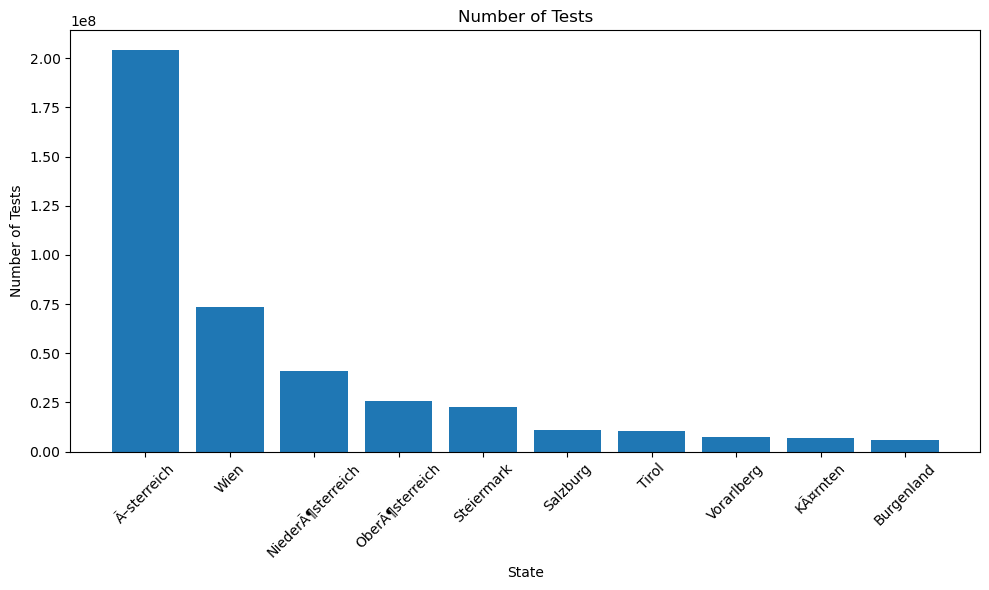

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  # Import numpy for array operations

# Run Cypher query
result = graph.run("""
MATCH (t:Tests) where t.BundeslandName <> 'Österreich'
RETURN t.BundeslandName, t.Tests
ORDER BY t.Tests DESC
""")

# Convert result to DataFrame
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# Replace None values with np.nan (NaN) or a default value
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Convert 't.Tests' column to numeric (in case it's not already)
df['t.Tests'] = pd.to_numeric(df['t.Tests'])

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.Tests'])
plt.xlabel('State')
plt.ylabel('Number of Tests')
plt.title('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [86]:
result = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich'
RETURN t.BundeslandName, sum(t.Tests)

""")

# Convert result to DataFrame
df = pd.DataFrame([dict(r) for r in result], columns=['t.BundeslandName', 't.Tests'])

# Replace None values with np.nan (NaN) or a default value
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Convert 't.Tests' column to numeric (in case it's not already)
df['t.Tests'] = pd.to_numeric(df['t.Tests'])

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['t.Tests'], labels=df['t.BundeslandName'], autopct='%1.1f%%')
plt.title('Distribution of Tests by State')
plt.tight_layout()
plt.show()


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1000x600 with 1 Axes>

SyntaxError: invalid syntax (426636006.py, line 1)

In [67]:
cypher_query = """
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich'
RETURN t.BundeslandName, t.Tests


"""

result = graph.run(cypher_query)

# Print the result
for record in result:
    print(record)

'Burgenland'	'638575'
'KÃ¤rnten'	'675557'
'NiederÃ¶sterreich'	'3400756'
'OberÃ¶sterreich'	'2162517'
'Salzburg'	'823353'
'Steiermark'	'1758065'
'Tirol'	'1521757'
'Vorarlberg'	'825612'
'Wien'	'3197153'
'Ã–sterreich'	'15003345'
'Burgenland'	'645941'
'KÃ¤rnten'	'704089'
'NiederÃ¶sterreich'	'3471229'
'OberÃ¶sterreich'	'2241062'
'Salzburg'	'847370'
'Steiermark'	'1801508'
'Tirol'	'1539898'
'Vorarlberg'	'842170'
'Wien'	'3264872'
'Ã–sterreich'	'15358139'
'Burgenland'	'656824'
'KÃ¤rnten'	'708065'
'NiederÃ¶sterreich'	'3525810'
'OberÃ¶sterreich'	'2276421'
'Salzburg'	'859248'
'Steiermark'	'1852502'
'Tirol'	'1552380'
'Vorarlberg'	'855489'
'Wien'	'3316131'
'Ã–sterreich'	'15602870'
'Burgenland'	'665306'
'KÃ¤rnten'	'709254'
'NiederÃ¶sterreich'	'3580743'
'OberÃ¶sterreich'	'2332134'
'Salzburg'	'871522'
'Steiermark'	'1899187'
'Tirol'	'1569811'
'Vorarlberg'	'868793'
'Wien'	'3367370'
'Ã–sterreich'	'15864120'
'Burgenland'	'677110'
'KÃ¤rnten'	'710375'
'NiederÃ¶sterreich'	'3631722'
'OberÃ¶sterreich'	'2368282'


Oder mit localhost:7687 kann man neo4j im Browser starten und sich dann mit den Daten anmelden und schauen ob die Verbindung möglich ist.

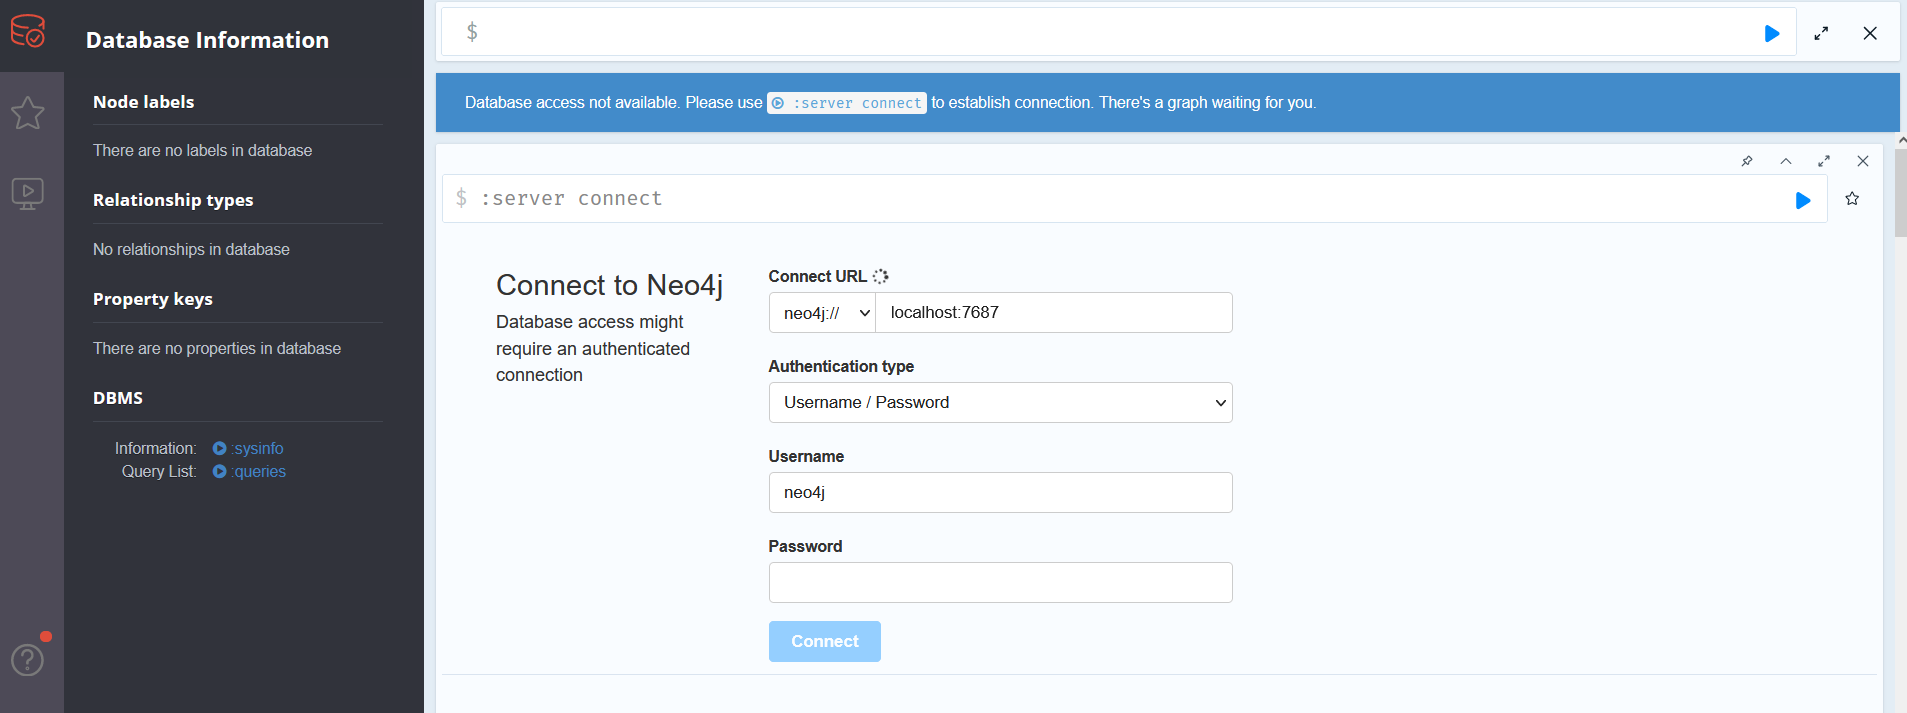

Die Daten können dann mit hilfe von csv, was vorher importiert wurde, einglesen werden und nachdem die Nodes deklariert wurden, kann der Graph erstellt werden mit py2neo.

Um abzufragen wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [69]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

28281


In Neo4j wird as Sprache "Cypher" verwendet. In dieser Sprache sind die Nodes mit () dargestellt und die Edges mit [] dargestellt. Hier werden alle Patienten die Covid gehabt haben ausgegeben:

In [68]:
cypher_query = """
MATCH (t:Tests)
RETURN *

"""

result = graph.run(cypher_query)

# Print the result
for record in result:
    print(record)

Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Datum='2021-03-01T09:30:00+01:00', Testungen='638575', TestungenAntigen='483140', TestungenPCR='155435')
Node('Tests', Antigen='483140', BundeslandID='1', BundeslandName='Burgenland', PCR='155435', Tests='638575', datum='2021-03-01T09:30:00+01:00')
Node('Tests', Antigen='457624', BundeslandID='2', BundeslandName='KÃ¤rnten', PCR='217933', Tests='675557', datum='2021-03-01T09:30:00+01:00')


Node('Tests', Antigen='2980518', BundeslandID='1', BundeslandName='Burgenland', PCR='576961', Tests='3557479', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='4759008', BundeslandID='2', BundeslandName='KÃ¤rnten', PCR='752736', Tests='5511744', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='15929614', BundeslandID='3', BundeslandName='NiederÃ¶sterreich', PCR='3389903', Tests='19319517', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='16172598', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='2515484', Tests='18688082', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='6842162', BundeslandID='5', BundeslandName='Salzburg', PCR='1450105', Tests='8292267', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='13336897', BundeslandID='6', BundeslandName='Steiermark', PCR='2499438', Tests='15836335', datum='2021-12-16T09:30:00+01:00')
Node('Tests', Antigen='5383553', BundeslandID='7', BundeslandName='Tirol', PCR='1689498', Tests='7073051',

Node('Tests', Antigen='18854925', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='6628922', Tests='25483847', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='7751858', BundeslandID='5', BundeslandName='Salzburg', PCR='3253732', Tests='11005590', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='15672736', BundeslandID='6', BundeslandName='Steiermark', PCR='6453491', Tests='22126227', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='5744834', BundeslandID='7', BundeslandName='Tirol', PCR='4074234', Tests='9819068', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='5609008', BundeslandID='8', BundeslandName='Vorarlberg', PCR='1633323', Tests='7242331', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='7656851', BundeslandID='9', BundeslandName='Wien', PCR='63731974', Tests='71388825', datum='2022-11-01T09:30:00+02:00')
Node('Tests', Antigen='95796613', BundeslandID='10', BundeslandName='Ã–sterreich', PCR='104459388', Tests='200256001', 

Node('Tests', Antigen='5057845', BundeslandID='8', BundeslandName='Vorarlberg', PCR='342367', Tests=5400212, datum='2021-11-18T09:30:00+01:00')
Node('Tests', Antigen='7079642', BundeslandID='9', BundeslandName='Wien', PCR='19529197', Tests=26608839, datum='2021-11-18T09:30:00+01:00')
Node('Tests', Antigen='75846795', BundeslandID='10', BundeslandName='Ã–sterreich', PCR='29478390', Tests=105325185, datum='2021-11-18T09:30:00+01:00')
Node('Tests', Antigen='2916792', BundeslandID='1', BundeslandName='Burgenland', PCR='442080', Tests=3358872, datum='2021-11-19T09:30:00+01:00')
Node('Tests', Antigen='4661143', BundeslandID='2', BundeslandName='KÃ¤rnten', PCR='539601', Tests=5200744, datum='2021-11-19T09:30:00+01:00')
Node('Tests', Antigen='15656211', BundeslandID='3', BundeslandName='NiederÃ¶sterreich', PCR='2926673', Tests=18582884, datum='2021-11-19T09:30:00+01:00')
Node('Tests', Antigen='15862580', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='1563508', Tests=17426088, datum='

Node('Tests', Antigen='7645796', BundeslandID='9', BundeslandName='Wien', PCR='62110171', Tests=69755967, datum='2022-09-25T09:30:00+02:00')
Node('Tests', Antigen='95261350', BundeslandID='10', BundeslandName='Ã–sterreich', PCR='102020143', Tests=197281493, datum='2022-09-25T09:30:00+02:00')
Node('Tests', Antigen='3597412', BundeslandID='1', BundeslandName='Burgenland', PCR='2009979', Tests=5607391, datum='2022-09-26T09:30:00+02:00')
Node('Tests', Antigen='5158926', BundeslandID='2', BundeslandName='KÃ¤rnten', PCR='1628215', Tests=6787141, datum='2022-09-26T09:30:00+02:00')
Node('Tests', Antigen='25636394', BundeslandID='3', BundeslandName='NiederÃ¶sterreich', PCR='14702785', Tests=40339179, datum='2022-09-26T09:30:00+02:00')
Node('Tests', Antigen='18655994', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='6501962', Tests=25157956, datum='2022-09-26T09:30:00+02:00')
Node('Tests', Antigen='7686745', BundeslandID='5', BundeslandName='Salzburg', PCR='3187377', Tests=10874122, dat

Node('Tests', Antigen='66530570', BundeslandID='10', BundeslandName='Ã–sterreich', PCR='19861284', Tests=86391854, datum='2021-09-28T09:30:00+02:00')
Node('Tests', Antigen='2731223', BundeslandID='1', BundeslandName='Burgenland', PCR='298055', Tests=3029278, datum='2021-09-29T09:30:00+02:00')
Node('Tests', Antigen='3802682', BundeslandID='2', BundeslandName='KÃ¤rnten', PCR='380489', Tests=4183171, datum='2021-09-29T09:30:00+02:00')
Node('Tests', Antigen='13898707', BundeslandID='3', BundeslandName='NiederÃ¶sterreich', PCR='2325270', Tests=16223977, datum='2021-09-29T09:30:00+02:00')
Node('Tests', Antigen='13356848', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='929557', Tests=14286405, datum='2021-09-29T09:30:00+02:00')
Node('Tests', Antigen='5418895', BundeslandID='5', BundeslandName='Salzburg', PCR='615722', Tests=6034617, datum='2021-09-29T09:30:00+02:00')
Node('Tests', Antigen='11182956', BundeslandID='6', BundeslandName='Steiermark', PCR='1050386', Tests=12233342, datum

Node('Tests', Antigen='18051409', BundeslandID='4', BundeslandName='OberÃ¶sterreich', PCR='6199529', Tests=24250938, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='7545958', BundeslandID='5', BundeslandName='Salzburg', PCR='3024508', Tests=10570466, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='15206564', BundeslandID='6', BundeslandName='Steiermark', PCR='5689638', Tests=20896202, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='5744834', BundeslandID='7', BundeslandName='Tirol', PCR='3782232', Tests=9527066, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='5530179', BundeslandID='8', BundeslandName='Vorarlberg', PCR='1522147', Tests=7052326, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='7576598', BundeslandID='9', BundeslandName='Wien', PCR='56158454', Tests=63735052, datum='2022-05-23T09:30:00+02:00')
Node('Tests', Antigen='93154285', BundeslandID='10', BundeslandName='Ã–sterreich', PCR='93266786', Tests=186421071, datum='2022-05-

Dies kann auch mit panda dargestellt werden:

In [10]:
import pandas as pd

# Assuming you have already executed the cypher_query and stored the result in 'result'
cypher_query = """
MATCH (p:Patient) WHERE p.covid='1'
RETURN p.kalenderWoche, p.wohnort, p.Geschlecht, p.covid, p.influenza, p.rsv, p.sonstige, p.aufnahmen, p.bev_zahl

"""

result = graph.run(cypher_query)

# Extract data from result
data = [dict(record) for record in result]

# Convert the result to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


     p.kalenderWoche p.wohnort p.Geschlecht p.covid p.influenza p.rsv  \
0        19. KW 2023       BGL            M       1           0     0   
1        19. KW 2023       BGL            W       1           0     0   
2        19. KW 2023       KTN            M       1           0     0   
3        19. KW 2023       NÃ–            M       1           0     0   
4        19. KW 2023       NÃ–            W       1           0     0   
...              ...       ...          ...     ...         ...   ...   
3197     12. KW 2024         V            M       1           0     0   
3198     12. KW 2024         W            M       1           0     0   
3199     12. KW 2024         W            M       1           1     1   
3200     12. KW 2024         W            W       1           2     0   
3201     12. KW 2024         W            W       1           0     0   

     p.sonstige p.aufnahmen p.bev_zahl  
0             3           4      13780  
1            16          16      12361  


In dem Neo4j Browser kann man auch alle vorhandenen Eigenschaften einer Column sehen. Dies wird erreicht durch das Anklicken des markierten Feldes:

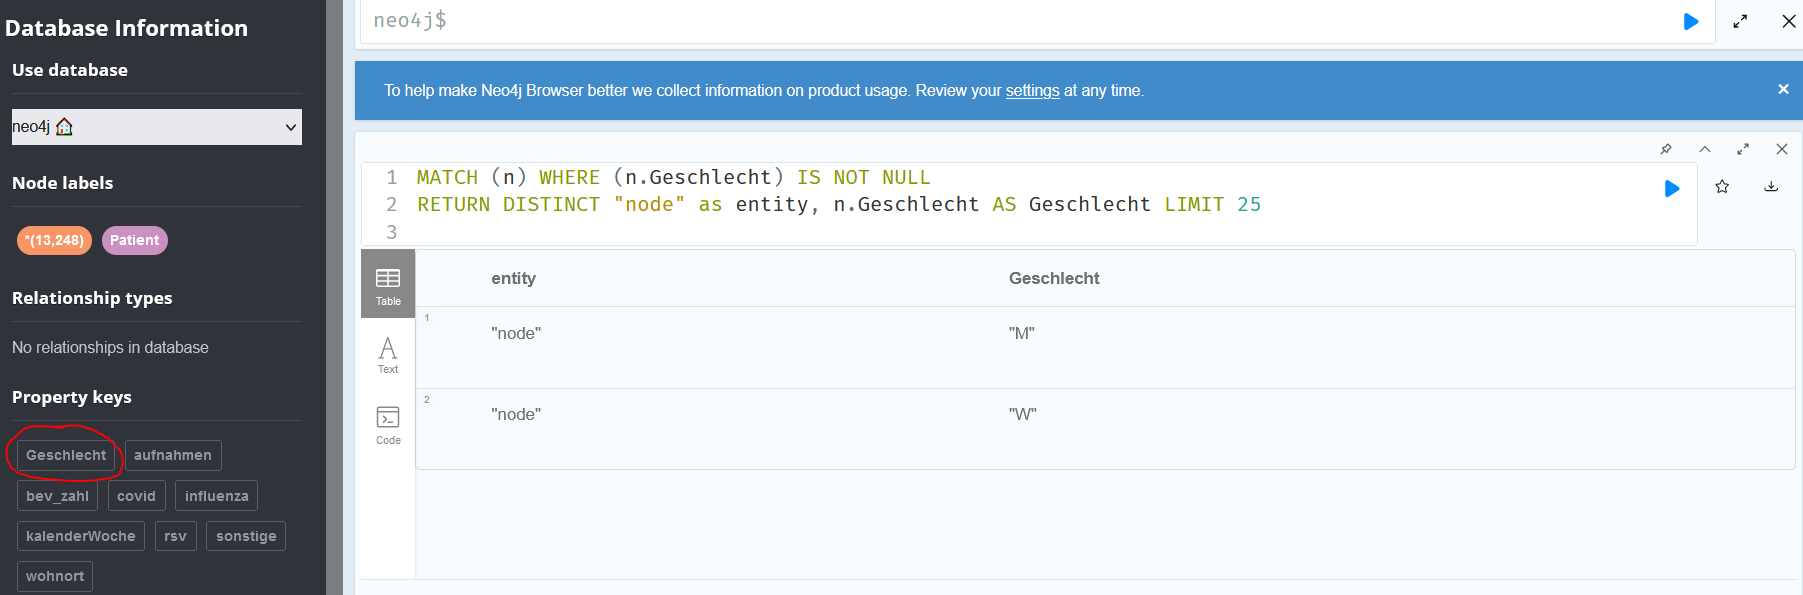

Danach kann der Container wieder geschlossen werden.

In [4]:
!docker ps

CONTAINER ID   IMAGE     COMMAND                  CREATED       STATUS         PORTS                               NAMES
cf8e78ee5190   mysql     "docker-entrypoint.sâ€¦"   3 weeks ago   Up 4 minutes   0.0.0.0:3306->3306/tcp, 33060/tcp   mysql-docker-db-1


In [2]:
!docker-compose down

In [70]:
!docker-compose -p completx_sql down

 Container neo4j-container  Stopping
 Container neo4j-container  Stopped
 Container neo4j-container  Removing
 Container neo4j-container  Removed
 Network completx_sql_default  Removing
 Network completx_sql_default  Removed


In [71]:
!docker volume ls

DRIVER    VOLUME NAME
local     01e437a5a8d8bc7e245b912d09d43424254839f9a5847bbca14ec50bedb2a39e
local     3_database-data
local     3b3cba9e74c6a871e7eeef09dfc218735c3c80bb62e0be6c1d74ae4ae1de5cf0
local     7d9498ec10cc26718ab37f95f2a204dd7ad2589e13b209033aae93f6f710cd75
local     08bcb7ca145378157cdb24b5d381f9d26ce32377bcadd234df8531f8aa185e8e
local     9f315ccce15adb1ae202b5370383bb3f819fa2b94a2f6b7bd98da7a45ece960e
local     9f97846584768df214df7d0bbe7bfda209a5f858f56c92fe9fb62089fd013d83
local     36ca6ada405c2a4d23bc5e2352d5f79ee0d27d9ed386700932d62cb1095d1fdd
local     96b8c055375e73443dc1d8626a93ff5666bcf8a76c9a98d86bd8ad6d5f0fafd6
local     215a821dc1e4df1fb51d5c53772d1092d0e7eba146f2573de7acf4bbeba893a4
local     315bc658367a4e7dc4c05184404ab09f06116d8f3bfcfb1a69e6fb3d11518883
local     0335d4430df3aab7395cbdd117074792e6e743120a0b2ed3e491612a181ef793
local     845e65b6633091fa435a9374ea94df8ff55b89f812cfea23afd6deb6f5d4b377
local     5724b7042f2b9f93e8ccb3ca67b34a8fc3411c7a9e

Um ein Volume zu löschen, kann man wieder folgenden Befehl verwenden:

In [72]:
!docker volume rm completx_sql_neo4j-data

completx_sql_neo4j-data


Anbei ist ein GitHub-Repository zu finden, in dem einige Queries sowie Videos verlinkt sind, die Ihnen helfen können, Cypher und Neo4j besser zu verstehen:
https://github.com/cj2001/bite_sized_data_science/tree/main

Ebenfalls sind in der Dokumentation von Neo4j viele hilfreiche Hinweise zu finden, zum Beispiel zum Import von CSV-Dateien über Python:
https://neo4j.com/docs/getting-started/data-import/csv-import/

Zuletzt noch ein Cheatsheet für Cypher: https://neo4j.com/docs/cypher-cheat-sheet/5/auradb-enterprise/